In [62]:
#导入使用的模块
import pandas as pd
import numpy as np
import requests
import os
import tweepy
import time
import csv
import json
import re
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [63]:
#导入twitter-archive-enhanced.csv文件
df = pd.read_csv("twitter-archive-enhanced.csv")

In [64]:
#从网站下载数据：
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)
    
os.listdir(folder_name)

['image-predictions.tsv']

In [65]:
img_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv',sep='\t')

#国内无法使用tweepy，使用tweet_json.txt数据(提取出id、转发数retweet_count，喜爱数favorite_count)

In [66]:
#　建立dirt字典，收集id，retweet_count和favorite_count
dirt = {'id':[],'favorite_count':[],'retweet_count':[]}
# 打开json形式储存的txt格式文件，并创建json_file文件对象
with open('tweet_json.txt', 'r') as json_file:
    # 读取file文件对象，然后遍历每一行信息
    for line in json_file.readlines():
        # json.loads将str格式转为dic格式
        data = json.loads(line)
        # 通过字典方法读取id，retweet_count和favorite_count信息，并存入dirt字典中
        dirt['id'].append(data['id'])
        dirt['favorite_count'].append(data['favorite_count'])
        dirt['retweet_count'].append(data['retweet_count'])

In [67]:
appendix = pd.DataFrame(dirt, columns=['id','favorite_count','retweet_count'])

### 评估数据

#### 1.查看数据

In [68]:
#查看twitter-archive-enhanced.csv文件
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [69]:
df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [71]:
sum(df.duplicated())

0

In [72]:
df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [73]:
#查看image-predictions.tsv文件
img_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1731,821107785811234820,https://pbs.twimg.com/media/C2UpLA-UcAEK_Fz.jpg,1,Pomeranian,0.856590,True,papillon,0.038537,True,Yorkshire_terrier,0.033146,True
907,700462010979500032,https://pbs.twimg.com/media/CbiKe7-W0AIVNNr.jpg,1,hamster,0.678651,False,Pomeranian,0.110268,True,Angora,0.104139,False
1930,858843525470990336,https://pbs.twimg.com/media/C-s5oYZXkAAMHHq.jpg,1,golden_retriever,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True
1242,747204161125646336,https://pbs.twimg.com/media/Cl6aOBhWEAALuti.jpg,2,coil,0.533699,False,dugong,0.087959,False,rain_barrel,0.039221,False
407,673709992831262724,https://pbs.twimg.com/media/CVl_qbjW4AA8Mam.jpg,1,Chihuahua,0.330171,True,Siamese_cat,0.181580,False,kelpie,0.178227,True


In [74]:
img_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [75]:
sum(img_predictions_df.duplicated())

0

In [76]:
img_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [77]:
#查看tweet_json.txt文件
appendix.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [78]:
appendix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
id                2352 non-null int64
favorite_count    2352 non-null int64
retweet_count     2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [79]:
sum(appendix.duplicated())

0

In [80]:
appendix.describe()

,id,favorite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


#### 2.评估数据

2.1twitter-archive-enhanced.csv文件：

* 缺少name数据：name中含有a、空白、none数据 *10月10日更新说明

* 数据中包含回复与转发信息(in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp) (无法清理) *2018年10月7日更新

* 缺少地位信息(doggo，floofer，pupper，puppo列)（无法清理）*10月10日更新有些狗会存在多种地位（stage），需对stage进行整理
  保留p1预测结果，如果p1_dog为false，则继续查看p2,p3预测结果。如果3个预测结果都不为狗，则保留NaN值。

* source是HTML标记语言格式

* 错误的数据类型(tweet_id，timestamp，stage，in_reply_to_status_id，in_reply_to_user_id，retweeted_status_id，retweeted_status_user_id，retweeted_status_timestamp)

* 数值异常(rating_numerator和rating_denominator)

* 检查评分的分子

2.2image-predictions.tsv文件

* 错误的数据类型(tweet_id)

* 没有图片数据 *2018年10月7日更新

2.3tweet_json.txt文件

* 错误的数据类型(id)

* id名称

2.4清洁度

* archive表格：

* doggo，floofer，pupper和puppo应该合并为一个变量stage

* 添加tweet_info 和 image_predictions 到 twitter_archive table *10月10日更新

In [81]:
#清理：

archive_clean = df.copy()

img_predictions_clean = img_predictions_df.copy()

appendix_clean = appendix.copy()

缺失数据

archive：缺失name数据

定义

运用str.extract和正则表达式解析出正确的name

代码

In [82]:
# 运用str.extract和正则表达式解析出每个tweet_id所对应的name
archive_clean['name'] = archive_clean.text.str.extract('This is ([A-Z][a-z]+)', expand=False)

测试

In [83]:
archive_clean.name.value_counts()

Lucy           10
Oliver          9
Penny           9
Cooper          9
Bo              9
Tucker          9
Charlie         9
Lola            7
Buddy           7
Oscar           6
Bella           6
Scout           6
Bailey          6
Koda            5
Louis           5
Alfie           5
Leo             5
Finn            5
Gus             5
Milo            4
Sampson         4
Phil            4
Cassie          4
Daisy           4
Toby            4
Dave            4
Ruby            4
Derek           4
Chip            4
Sadie           4
               ..
Hector          1
Fiji            1
Olivi           1
Bradley         1
Sailor          1
Pippin          1
Jo              1
Timmy           1
Henry           1
Shadow          1
Apollo          1
Beebop          1
Pawnd           1
Shakespeare     1
Wiggles         1
Philippe        1
Trigger         1
River           1
Franq           1
Tedders         1
Crumpet         1
Sandra          1
Bronte          1
Trevith         1
Samsom    

清洁度

#10月10日更新：
archive文本中，有些狗会存在多种'status‘，清理文本中的doggo，floofer，pupper和puppo，合并为一个变量dog_stage


代码

In [84]:
archive_clean = df.copy()

In [85]:
# 狗狗stage列标明的数量
(archive_clean.doggo!='None').sum()+(archive_clean.floofer!='None').sum()+(archive_clean.pupper!='None').sum()+(archive_clean.puppo!='None').sum()

394

In [86]:
dog_stage = archive_clean['text'].apply(lambda x: ','.join(re.findall(r'(puppo|pupper|floofer|doggo|floof)', x)))

In [87]:
dog_stage=dog_stage.str.replace('floofer','floof')
archive_clean['dog_stage']=dog_stage

In [88]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dog_stage                     23

In [89]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
461,817536400337801217,NaN,NaN,2017-01-07 01:00:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Eugene &amp; Patti Melt. No matte...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/817536400...,12,10,Eugene,None,None,None,None,
464,817415592588222464,NaN,NaN,2017-01-06 17:00:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Strudel. He's rather h*ckin pupset that y...,NaN,NaN,NaN,https://www.gofundme.com/help-strudel-walk-aga...,11,10,Strudel,None,None,None,None,
178,857263160327368704,NaN,NaN,2017-04-26 16:00:39 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar and Oliver. Oliver shrunk Oscar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/857263160...,13,10,Oscar,None,None,None,None,


In [90]:
archive_clean['dog_stage'].value_counts()

                        1938
pupper                   254
doggo                     86
puppo                     35
floof                     21
doggo,pupper               7
pupper,pupper              7
pupper,doggo               2
floof,floof                2
puppo,doggo                2
pupper,doggo,doggo         1
pupper,pupper,pupper       1
Name: dog_stage, dtype: int64

In [91]:
#修改重复值
archive_clean['dog_stage']=archive_clean['dog_stage'].str.replace('pupper,pupper,pupper','pupper')
archive_clean['dog_stage']=archive_clean['dog_stage'].str.replace('pupper,doggo,doggo','doggo')
archive_clean['dog_stage']=archive_clean['dog_stage'].str.replace('pupper,pupper','pupper')
archive_clean['dog_stage']=archive_clean['dog_stage'].str.replace('floof,floof','floof')

In [92]:
archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None,


In [93]:
#删除pupper,doggo等四列
archive_clean.drop(['doggo','floofer','pupper','puppo'],axis=1,inplace=True)

In [94]:
archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,


定义：删除掉关于retweets的数据 *2018年10月7日更新

代码

In [95]:
archive_clean = archive_clean[archive_clean['retweeted_status_id'].isnull()]

测试

In [96]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_stage                     2175 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


In [97]:
archive_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
1676,682088079302213632,NaN,NaN,2015-12-30 06:37:25 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",I'm not sure what this dog is doing but it's p...,NaN,NaN,NaN,https://vine.co/v/iqMjlxULzbn,12,10,None,
1897,674737130913071104,NaN,NaN,2015-12-09 23:47:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rufio. He is unaware of the pink legless ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/674737130...,10,10,Rufio,pupper
1773,678255464182861824,NaN,NaN,2015-12-19 16:47:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jessifer. She is a Bismoth Teriyaki. F...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678255464...,9,10,Jessifer,


In [98]:
archive_clean = archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis = 1)

In [99]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
dog_stage                2175 non-null object
dtypes: float64(2), int64(3), object(6)
memory usage: 203.9+ KB


In [100]:
#检查评分的分子 *10月12日更新
archive_clean.rating_numerator.value_counts()

12      500
10      442
11      426
13      307
9       156
8        98
7        54
14       43
5        36
6        32
3        19
4        17
2         9
1         8
420       2
0         2
20        1
24        1
26        1
84        1
44        1
50        1
60        1
80        1
165       1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
15        1
17        1
27        1
45        1
75        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [101]:
#检查分母
archive_clean.rating_denominator.value_counts()

10     2153
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [102]:
#提取一个分子、分母大于10的数据行进行查看
archive_clean.text[902]

'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE'

In [103]:
# 查看一个评分分母为0的text
print(archive_clean.query('rating_denominator==0').text[313])

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [104]:
type(archive_clean.timestamp[0])

str

定义：去除没有图像的数据 *2018年10月9日更新

代码

In [105]:
#添加tweet_info 和 image_predictions 到 twitter_archive table. 2018年10月9日更新
twitter_archive_clean = pd.merge(left=archive_clean, right=appendix_clean, left_on='tweet_id', right_on='id', how='inner')

In [106]:
twitter_archive_clean = twitter_archive_clean.merge(img_predictions_clean, on='tweet_id', how='inner')

In [107]:
twitter_archive_clean = twitter_archive_clean.drop('id', axis=1)

In [108]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                1994 non-null object
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  199

In [109]:
#去除没有images(expand_urls)的数据
twitter_archive_clean = twitter_archive_clean.dropna(subset=['expanded_urls'])

测试

In [110]:
sum(twitter_archive_clean['expanded_urls'].isnull())

0

In [111]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
664,758355060040593408,NaN,NaN,2016-07-27 17:35:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Corey. He's a Portobello Corgicool. Tr...,https://twitter.com/dog_rates/status/758355060...,11,10,Corey,...,1,Pembroke,0.987643,True,Cardigan,0.012112,True,Siamese_cat,0.000117,False


质量

source是HTML标记语言格式 

定义

运用str.extract提取source中的来源信息

代码

In [112]:
#10月11日更新，弃用原来的三个表格，使用twitter_archive_clean主表格
twitter_archive_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1955
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       28
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [113]:
twitter_archive_clean['source']=twitter_archive_clean['source'].str.extract('(iPhone|Web Client|TweetDeck)')

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


测试

In [114]:
twitter_archive_clean.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1597,673680198160809984,NaN,NaN,2015-12-07 01:47:30 +0000,iPhone,This is Shnuggles. I would kill for Shnuggles....,https://twitter.com/dog_rates/status/673680198...,13,10,Shnuggles,...,1,Samoyed,0.989853,True,Arctic_fox,0.003344,False,chow,0.002802,True


In [115]:
twitter_archive_clean.source.value_counts()

iPhone        1955
Web Client      28
TweetDeck       11
Name: source, dtype: int64

质量

错误的数据类型错误的数据类型(tweet_id，timestamp，staging)

定义

运用astpye将tweet_id转化为整数数据类型，将timestamp转化为datetime数据类型，将staging转化为分类数据类型

代码

In [116]:
# 将tweet_id转为整数类型
twitter_archive_clean['tweet_id'] = twitter_archive_clean.tweet_id.astype(str)

twitter_archive_clean['in_reply_to_status_id'] = twitter_archive_clean.in_reply_to_status_id.astype(str)
twitter_archive_clean['in_reply_to_user_id'] = twitter_archive_clean.in_reply_to_user_id.astype(str)

# 将Stage转为分类数据类型
twitter_archive_clean['dog_stage'] = twitter_archive_clean.dog_stage.astype('category')

In [117]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id                 1994 non-null object
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
dog_stage                1994 non-null category
favorite_count           1994 non-null int64
retweet_count            1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                

In [118]:
twitter_archive_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


数值异常(rating_numerator和rating_denominator)

定义

按照weratedogs的标准，运用布尔索引筛选出rating_denominator恒定为10，rating_numerator大于10且小于20的数据

代码

In [119]:
twitter_archive_clean = twitter_archive_clean[(twitter_archive_clean.rating_numerator >= 10)&(twitter_archive_clean.rating_numerator <= 20)&(twitter_archive_clean.rating_denominator == 10)]

测试

In [120]:
twitter_archive_clean.describe()

,rating_numerator,rating_denominator,favorite_count,retweet_count,img_num,p1_conf,p2_conf,p3_conf
count,1561.000000,1561.0,1561.000000,1561.000000,1561.000000,1561.000000,1.561000e+03,1.561000e+03
mean,11.421525,10.0,10548.936579,3233.249199,1.247277,0.607500,1.350796e-01,5.966829e-02
std,1.118217,0.0,13362.334048,5167.713890,0.613184,0.268745,1.015676e-01,5.153875e-02
min,10.000000,10.0,81.000000,15.000000,1.000000,0.055379,1.011300e-08,1.740170e-10
25%,10.000000,10.0,2550.000000,772.000000,1.000000,0.371146,5.251140e-02,1.522800e-02
50%,11.000000,10.0,5729.000000,1751.000000,1.000000,0.608537,1.197450e-01,4.835900e-02
75%,12.000000,10.0,13786.000000,3746.000000,1.000000,0.853684,1.955580e-01,9.160200e-02
max,14.000000,10.0,132318.000000,79116.000000,4.000000,1.000000,4.676780e-01,2.710420e-01


定义 *10月12日更新

保留p1预测结果，如果p1_dog为false，则继续查看p2,p3预测结果。如果3个预测结果都不为狗，则保留NaN值。

代码

In [121]:
breed=[]
conf=[]


def prediction(dataframe):
    if dataframe['p1_dog'] is True:
        breed.append(dataframe['p1'])
        conf.append(dataframe['p1_conf'])
       
    elif dataframe['p2_dog'] is True:
        breed.append(dataframe['p2'])
        conf.append(dataframe['p2_conf'])
        
    elif dataframe['p3_dog'] is True:
        breed.append(dataframe['p3'])
        conf.append(dataframe['p3_conf'])
        
    else:
        breed.append("NaN")
        conf.append("NaN")
                

twitter_archive_clean.apply(prediction, axis=1)

0       None
1       None
2       None
3       None
4       None
5       None
6       None
7       None
8       None
9       None
10      None
11      None
12      None
13      None
14      None
15      None
16      None
17      None
18      None
19      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
        ... 
1924    None
1925    None
1929    None
1930    None
1931    None
1932    None
1933    None
1934    None
1936    None
1938    None
1939    None
1941    None
1942    None
1944    None
1945    None
1949    None
1951    None
1956    None
1959    None
1962    None
1963    None
1967    None
1970    None
1974    None
1975    None
1977    None
1981    None
1983    None
1986    None
1988    None
Length: 1561, dtype: object

In [122]:
# 将breed和相应的可信度补充进dataframe
twitter_archive_clean['breed']=breed
twitter_archive_clean['conf']=conf

In [123]:
# 删除img_num至p3_dog列
twitter_archive_clean.drop(['img_num','p1','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'],axis=1,inplace=True)

测试

In [124]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,breed,conf
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,nan,nan,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,25445,4301,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,nan,nan,2017-07-30 15:58:51 +0000,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,42863,8925,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,nan,nan,2017-07-29 16:00:24 +0000,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,41016,9721,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712


In [125]:
# 发现第0行的breed和conf均为NaN，也就是预测图片中不是狗狗。查看相应的URL进行确认
twitter_archive_clean.jpg_url[0]

'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg'

上图即为第0行数据对应的狗狗照片，可能由于甜甜圈在图片中的占比过大，导致无法识别。

使用正则表达式，在text列中根据常见的语法重新为宠物名赋值  *10月12日更新

This is (name)

Meet (name)

Named (name)

Say hello to (name)

为没有注明宠物名字赋空值

为避免错取关键字a、the，只选择以大写字母开头的名字。

In [126]:
dog_name=[]
for text in twitter_archive_clean['text']:
    try:
        if 'This is' in text:
            dog_name.append(re.search("This is ([A-Z]\w+)",text).group(1))
        elif  'Meet' in text:
            dog_name.append(re.search("Meet ([A-Z]\w+)",text).group(1))
        elif 'named' in text:
            dog_name.append(re.search("named ([A-Z]\w+)",text).group(1))
        elif 'Say hello to' in text:
            dog_name.append(re.search("Say hello to ([A-Z]\w+)",text).group(1))
        else:
            dog_name.append(np.nan)
    except AttributeError:
        dog_name.append(np.nan)

In [127]:
twitter_archive_clean['dog_name']=dog_name

In [128]:
twitter_archive_clean['dog_name'].value_counts()

Charlie    11
Lucy       10
Cooper      9
Oliver      9
Tucker      8
Penny       7
Sadie       7
Winston     7
Daisy       6
Bo          6
Koda        6
Toby        5
Milo        5
Lola        5
Leo         5
Louis       5
Jax         5
Stanley     5
Bella       4
Finn        4
Duke        4
Winnie      4
Bear        4
Cassie      4
Derek       4
Rusty       4
Chester     4
Archie      4
Bailey      4
Oakley      4
           ..
Maddie      1
Tripp       1
Hall        1
Pavlov      1
Hector      1
Banditt     1
Rizzy       1
Bradley     1
Butter      1
Sparky      1
Duddles     1
Nollie      1
Kramer      1
Wiggles     1
Trigger     1
River       1
Herald      1
Astrid      1
Andy        1
Tedders     1
Birf        1
JD          1
Zara        1
Nugget      1
Sandra      1
Bronte      1
Ruffles     1
Taz         1
Pete        1
Koko        1
Name: dog_name, Length: 769, dtype: int64

In [129]:
#检查分母

In [130]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

文件储存

In [134]:
# twitter_archive_clean储存为twitter_archive_master.csv
twitter_archive_clean.to_csv('twitter_archive_master.csv', index = False)

In [135]:
twitter_archive_clean.drop(['name'],axis=1,inplace=True)

In [136]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,jpg_url,breed,conf,dog_name
0,892420643555336193,nan,nan,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,,39492,8842,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,NaN,Phineas
1,892177421306343426,nan,nan,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,,33786,6480,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,Tilly


绘图

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
sns.set_style('whitegrid')
sns.set_palette(sns.color_palette('hls',10))

最受欢迎的狗狗名字 Top 10

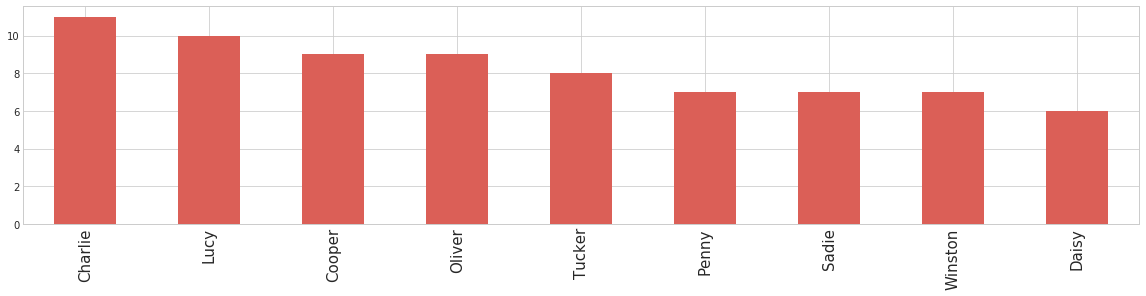

In [138]:
ax=twitter_archive_clean.dog_name.value_counts()[0:9].plot(kind='bar',figsize=(20,4))
ax.tick_params(axis='x',labelsize=15)

博主发布tweeter最常用的source

([<matplotlib.patches.Wedge at 0x7f9c2e27b0b8>,
 [Text(-1.09849,0.0575327,'iPhone'),
  Text(1.09727,-0.0774191,'Web Client'),
  Text(1.09982,-0.0199231,'TweetDeck')])

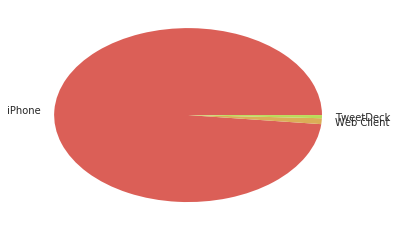

In [139]:
fig=twitter_archive_clean.source.value_counts()
plt.pie(fig, labels=fig.index)

最多点赞

In [140]:
twitter_archive_clean[twitter_archive_clean.favorite_count==twitter_archive_clean.favorite_count.max()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,dog_stage,favorite_count,retweet_count,jpg_url,breed,conf,dog_name
309,822872901745569793,nan,nan,2017-01-21 18:26:02 +0000,iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13,10,puppo,132318,47958,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,Lakeland_terrier,0.196015,NaN


In [141]:
twitter_archive_clean[twitter_archive_clean.favorite_count==132318].jpg_url

309    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
Name: jpg_url, dtype: object

In [142]:
twitter_archive_clean.text[309]

"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc"

对比点赞数和转发数

[(0, 150000)]

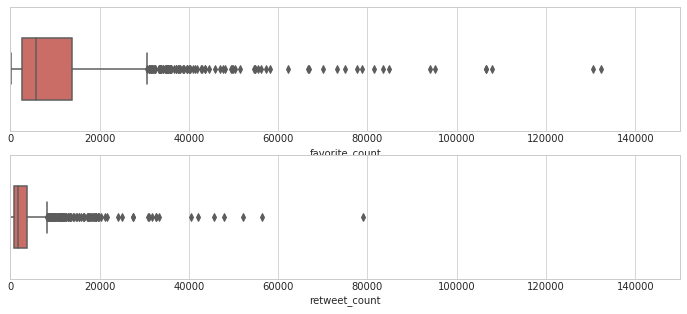

In [143]:
fig =plt.figure(figsize=(12,5))
ax1=fig.add_subplot(211)
sns.boxplot(x=twitter_archive_clean.favorite_count,data=twitter_archive_clean,width=0.5).set(xlim=(0,150000))
ax2=fig.add_subplot(212)
sns.boxplot(x=twitter_archive_clean.retweet_count,data=twitter_archive_clean,width=0.5).set(xlim=(0,150000))

推文中出现频率最高的品种

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

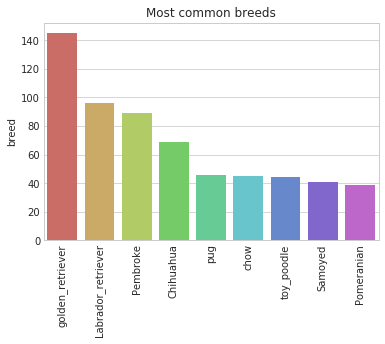

In [144]:
ax=twitter_archive_clean.breed.value_counts()[1:10]
fig=sns.barplot(x=ax.index,y=ax)
fig.set_title("Most common breeds")
plt.xticks(rotation=90)